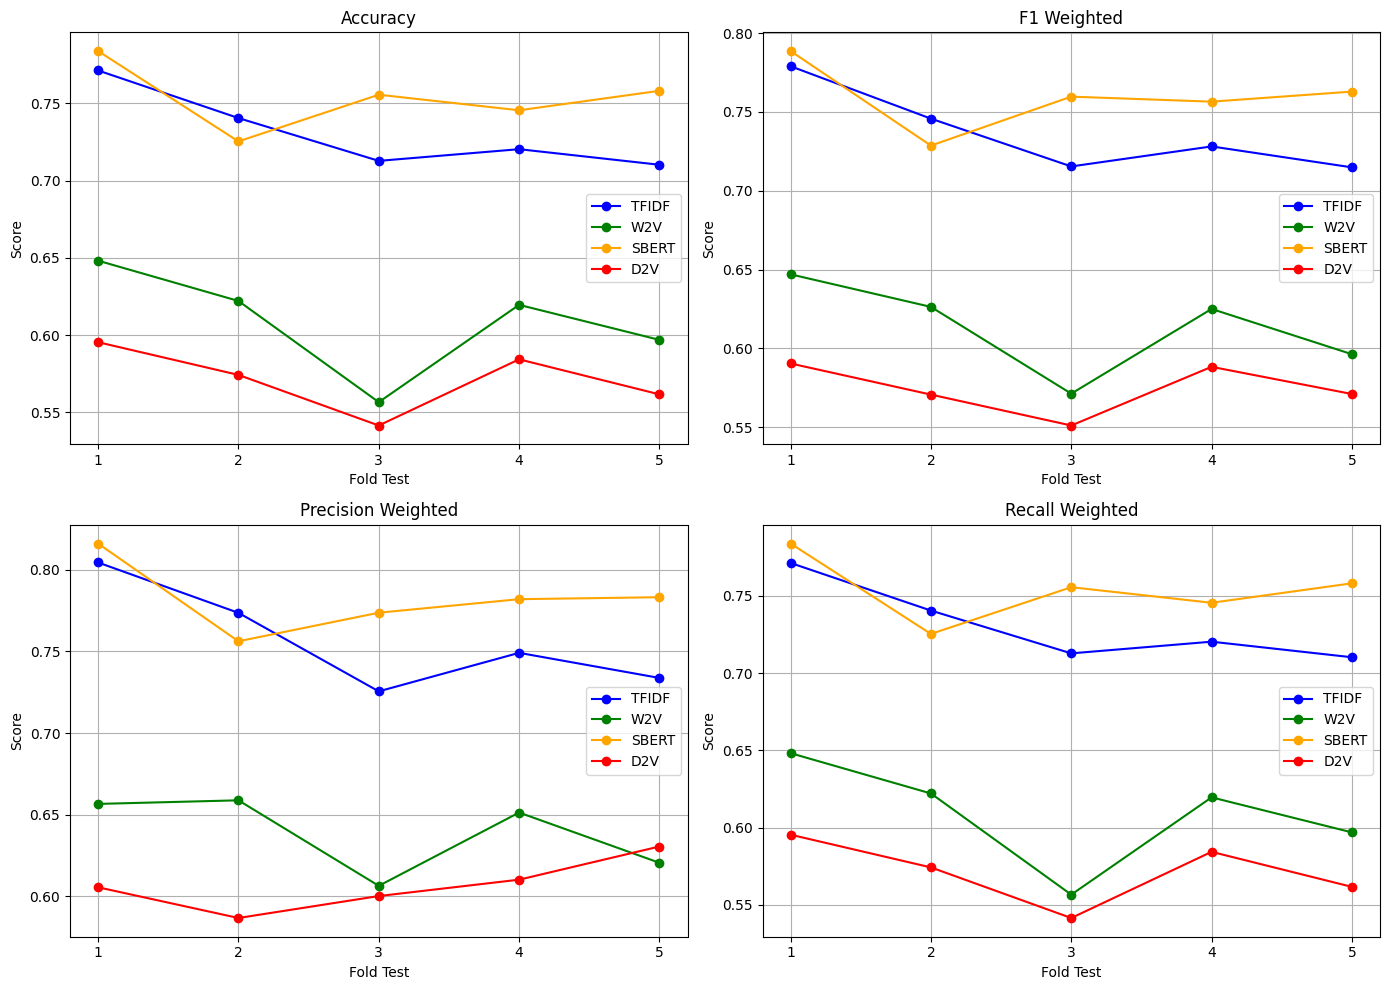

In [1]:
import json
import matplotlib.pyplot as plt
import os

# Load data from JSON file
with open('results.json', 'r') as f:
    results = json.load(f)

data = {}

for feat_type in results:
    data[feat_type] = {}
    entry = results[feat_type]  # Assumes a single entry per feature type
    metrics = entry['metrics']
    for metric_name in metrics:
        data[feat_type][metric_name] = metrics[metric_name]['test']['folds']

metrics_list = ["accuracy", "f1_weighted", "precision_weighted", "recall_weighted"]

colors = {
    "TFIDF": "blue",
    "SBERT": "orange",
    "W2V": "green",
    "D2V": "red"
}

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics_list):
    ax = axes[i]
    for feat_type in data:
        # Plot metric scores across folds
        ax.plot(
            range(1, len(data[feat_type][metric]) + 1),
            data[feat_type][metric],
            label=feat_type,
            marker='o',
            color=colors.get(feat_type, None)
        )
    ax.set_title(metric.replace('_', ' ').title())
    ax.set_xlabel('Fold Test')
    ax.set_ylabel('Score')
    ax.set_xticks(range(1, len(data[feat_type][metric]) + 1))
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [2]:
results_file = "results.json"
output_file = "../../classifierEvaluation.json"

# Load the results from file
with open(results_file, 'r') as f:
    results = json.load(f)

# Identify the feature extraction method with the highest f1_weighted score on test set
best_model = None
best_score = -1
best_key = ""

for feature_type, runs in results.items():
    # Assumes only one run per feature type
    f1_test_mean = runs["metrics"]["f1_weighted"]["test"]["mean"]
    if f1_test_mean > best_score:
        best_score = f1_test_mean
        best_model = runs
        best_key = feature_type

section_key = "LR_" + best_key  # Prefix to indicate the classifier type

# Load or initialize the output JSON structure
if os.path.exists(output_file):
    with open(output_file, 'r') as f:
        data = json.load(f)
else:
    data = {} 

data[section_key] = best_model  # Save the best model under the section key

# Write the updated data back to file
with open(output_file, 'w') as f:
    json.dump(data, f, indent=4)

print(f"Saved the best model")

Saved the best model
